### ***This dummy repository provides a focused and comprehensive set of technical interview questions for `Data Analytics`, `Visualization`, and `EDA fundamentals`. The included Python code and a dummy CSV file offer hands-on, practical examples to ensure we are fully prepared to demonstrate your skills and ace your next technical interview.***

## `01: Loading and Inspecting Data`

#### **Q1: How do you load a CSV file and check for missing values and data types?**

In [1]:
# Importing Libraries
import pandas as pd
import numpy as np

# Dummy CSV Creation
data = {
    "CustID": range(1, 11),
    "Age": [25, 30, 35, np.nan, 40, 45, 20, 50, np.nan, 32],
    "Gender": ["Male", "Female", "Female", "Male", "Male", "Female", "Male", "Female", "Male", "Female"], 
    "Income": [40000, 50000, 60000, 55000, 45000, 70000, 48000, np.nan, 52000, 58000],
    "Churn":[0, 1, 0, 1, 0, 0, 1, 0, 1, 0]
}

gen_df = pd.DataFrame(data)
gen_df.to_csv("dummy_cust.csv", index = False)
## 'INDEX = FALSE' here make the output apepars to be much cleaner as the extra column at the 
## beginning with index numbers (0,1,2,...) is eliminated.

# Load CSV File
gen_df = pd.read_csv("dummy_cust.csv")

# Inspect
print(f"Shape of Dataset: \n {gen_df.shape}\n")
print(f"Data Information: \n {gen_df.info()}\n")
print(f"Random 5 Sample rows:\n {gen_df.sample(5)}\n")
#print(f"Data Types:\n {gen_df.dtypes}\n")

Shape of Dataset: 
 (10, 5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   CustID  10 non-null     int64  
 1   Age     8 non-null      float64
 2   Gender  10 non-null     object 
 3   Income  9 non-null      float64
 4   Churn   10 non-null     int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 532.0+ bytes
Data Information: 
 None

Random 5 Sample rows:
    CustID   Age  Gender   Income  Churn
1       2  30.0  Female  50000.0      1
6       7  20.0    Male  48000.0      1
2       3  35.0  Female  60000.0      0
7       8  50.0  Female      NaN      0
9      10  32.0  Female  58000.0      0



## `02: Summary Statistics and Data Understanding`

#### **Q2: How would you generate Summary Statistics and Detect Outliers?**

In [2]:
# Summary
print(f"Data Statistics: \n {gen_df.describe(include = 'all')}")

Data Statistics: 
           CustID        Age Gender        Income      Churn
count   10.00000   8.000000     10      9.000000  10.000000
unique       NaN        NaN      2           NaN        NaN
top          NaN        NaN   Male           NaN        NaN
freq         NaN        NaN      5           NaN        NaN
mean     5.50000  34.625000    NaN  53111.111111   0.400000
std      3.02765  10.056093    NaN   8908.485343   0.516398
min      1.00000  20.000000    NaN  40000.000000   0.000000
25%      3.25000  28.750000    NaN  48000.000000   0.000000
50%      5.50000  33.500000    NaN  52000.000000   0.000000
75%      7.75000  41.250000    NaN  58000.000000   1.000000
max     10.00000  50.000000    NaN  70000.000000   1.000000


In [3]:
# Detecting Outliers with IQR
Q1 = gen_df['Income'].quantile(0.25)
Q3 = gen_df['Income'].quantile(0.75)
IQR = Q3 - Q1
outliers = gen_df[(gen_df['Income'] < (Q1 - 1.5 * IQR)) | (gen_df['Income'] > (Q3 + 1.5 * IQR))]
print("\nOutliers:\n", outliers)


Outliers:
 Empty DataFrame
Columns: [CustID, Age, Gender, Income, Churn]
Index: []


## `03: Data Cleaning`

#### **Q3: How would you handle Missing Values in the dataset?**

In [4]:
## Option-1: Fill with MEAN
gen_df['Age'].fillna(gen_df['Age'].mean(), inplace =True)
print(f"Dataset filled with MEAN values:\n{gen_df.sample(10)}")

## Option-2: Fill with MEDIAN
gen_df['Income'].fillna(gen_df['Income'].median(), inplace = True)
print(f"\nDataset filled with MEDIAN values:\n{gen_df.sample(10)}")

Dataset filled with MEAN values:
   CustID     Age  Gender   Income  Churn
6       7  20.000    Male  48000.0      1
2       3  35.000  Female  60000.0      0
5       6  45.000  Female  70000.0      0
1       2  30.000  Female  50000.0      1
3       4  34.625    Male  55000.0      1
7       8  50.000  Female      NaN      0
4       5  40.000    Male  45000.0      0
0       1  25.000    Male  40000.0      0
8       9  34.625    Male  52000.0      1
9      10  32.000  Female  58000.0      0

Dataset filled with MEDIAN values:
   CustID     Age  Gender   Income  Churn
5       6  45.000  Female  70000.0      0
9      10  32.000  Female  58000.0      0
3       4  34.625    Male  55000.0      1
8       9  34.625    Male  52000.0      1
6       7  20.000    Male  48000.0      1
1       2  30.000  Female  50000.0      1
2       3  35.000  Female  60000.0      0
4       5  40.000    Male  45000.0      0
0       1  25.000    Male  40000.0      0
7       8  50.000  Female  52000.0      0


C:\Users\deepe\AppData\Local\Temp\ipykernel_9684\3347765841.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  gen_df['Age'].fillna(gen_df['Age'].mean(), inplace =True)
C:\Users\deepe\AppData\Local\Temp\ipykernel_9684\3347765841.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.



## `04: Data Visualization`

#### **Q4: How do you visualise the distribution of NUMERICAL and CATEGORICAL Variables?**

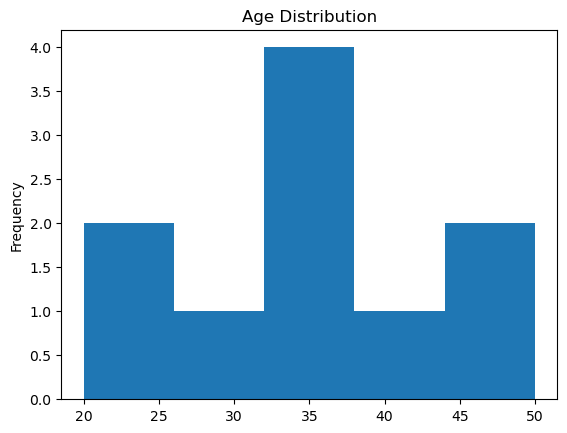

In [5]:
import matplotlib.pyplot as plt

# Histogram
gen_df['Age'].plot(kind = "hist", bins = 5, title = "Age Distribution")
plt.show()

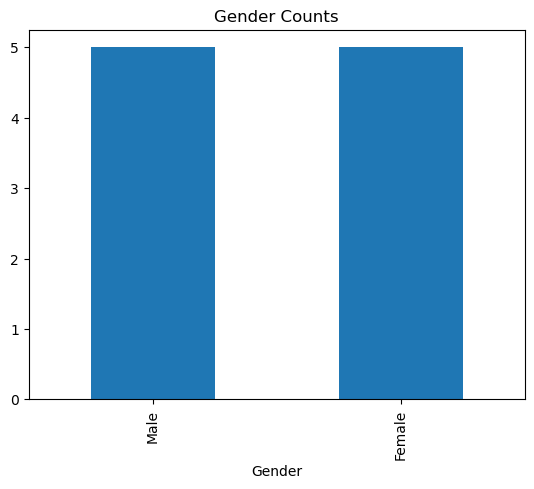

In [6]:
# Bar Plot for Gender
gen_df['Gender'].value_counts().plot(kind = "bar", title = "Gender Counts")
plt.show()

## `05: Correlation Analysis`

#### **Q5: How would you check the correlation between VARIABLES?**

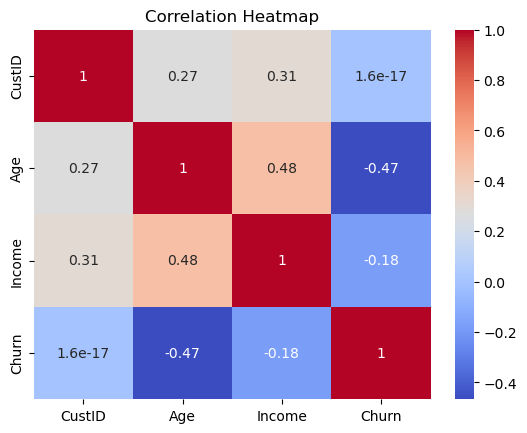

In [7]:
import seaborn as sns

## Correlation Analysis
corr = gen_df.corr(numeric_only = True)
sns.heatmap(corr, annot = True, cmap = "coolwarm")
plt.title("Correlation Heatmap")
plt.show()

## `06: Grouping & Aggregation`

#### **Q6: How do you analyse AVERAGE Income by Gender?**

In [8]:
avg_income = gen_df.groupby("Gender")["Income"].mean()
print(f"Average Income Gender Wise:\n{avg_income}")

Average Income Gender Wise:
Gender
Female    58000.0
Male      48000.0
Name: Income, dtype: float64


## `07: Feature Relationship`

#### **Q7: How would you VISUALISE the relationship between Age and Income?**

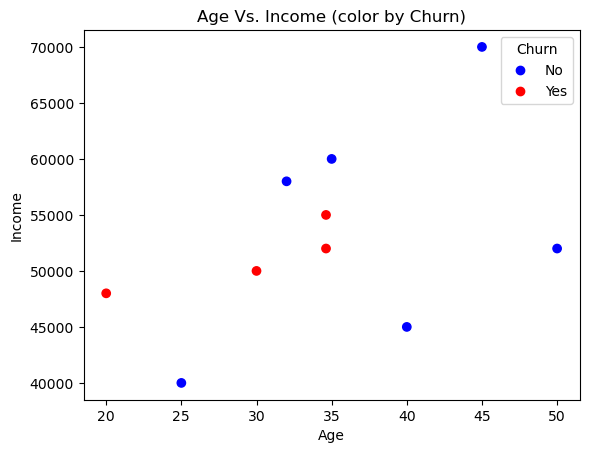

In [9]:
scatter = plt.scatter(gen_df['Age'], gen_df['Income'], c = gen_df['Churn'], cmap = 'bwr')
handles, _ = scatter.legend_elements()
labels = ['No', 'Yes']
plt.legend(handles = handles, labels = labels, title = 'Churn')
plt.title("Age Vs. Income (color by Churn)")
plt.xlabel("Age")
plt.ylabel("Income")
plt.show()

## `08: Categorical vs. Target Analysis`

#### **Q8: How do you check CHURN RATE by GENDER?**

In [10]:
churn_rate = (gen_df.groupby("Gender")["Churn"].mean()*100).astype('string')+ '%'
## Alternatively 
# churn_rate.apply(lambda x: f"{x:.2f}%") 

print(f"Churn Rate by Gender:\n{churn_rate}")

Churn Rate by Gender:
Gender
Female    20.0%
Male      60.0%
Name: Churn, dtype: string


## `09: Pivot Table Analysis`

#### **Q9: Hw would you create a pivot table based on GENDER and AGE GROUP?**

In [11]:
gen_df['AgeGroup'] = pd.cut(gen_df['Age'],
                            bins = [20, 30, 40, 50, 60],
                            labels = ["20-30", "30-40", "40-50", "50-60"])
pivot = pd.pivot_table(gen_df, values = 'Churn', index = 'Gender', columns = 'AgeGroup', aggfunc = 'mean', observed = False)
print(f"Churn based on Gender & Age Group:\n{pivot}")

Churn based on Gender & Age Group:
AgeGroup  20-30     30-40  40-50
Gender                          
Female      1.0  0.000000    0.0
Male        0.0  0.666667    NaN


## `10: Insights & Recommendations`

### ***`10.1: INSIGHTS`***
**01 - Data Gaps**

*1.1: A few customers don’t have their age or income recorded. That hints at some lapses in data collection.*

**02 - Who Our Customers Are**

*2.1: Most of our customers fall between 25–50 years old, so we’re dealing mostly with working professionals.*

*2.2: The gender split looks fairly balanced.*

**03 - Earnings Picture**

*3.1: On average, people are earning about 50k–55k.*

*3.2: There are a couple of customers on the far high/low end, but most stay in this middle range.*

**04 - Churn Story**

*4.1: About 4 in 10 customers leave.*

*4.2: Looking deeper: men are churning at nearly double the rate of women.*

**05 - Patterns in Age & Income**

*5.1: Older customers tend to earn more, which makes sense.*

*5.2: Younger and lower-income customers are leaving more often than others.*

**06 - Segment View**

*6.1: Customers in their 20s are the hardest to retain.*

*6.2: Customers in their 40s and above stick around longer, especially women with higher incomes.*

### ***`10.2: RECOMMENDATIONS`***

**`01 -`** *Fix the basics first: We should improve how we capture customer data so things like income and age aren’t missing.*

**`02 -`** *Keep young customers engaged: People in their 20s are leaving the most, so we might need special onboarding, loyalty perks, or more personalised offers to keep them interested.*

**`03 -`** *Focus on men: Men seem less loyal compared to women in this sample. It might be worth digging into why, and designing campaigns tailored for them.*

**`04 -`** *Segment by income: Lower-income customers are more likely to drop off — maybe they need cheaper plans or flexible options. High-income customers, on the other hand, might respond better to premium benefits or exclusivity.*

**`05 -`** *Dig deeper: We should also collect more behaviour-related data (like purchase frequency or usage patterns) to really understand what drives churn and maybe even predict it before it happens.*

## ***`Summary of EDA Process`***

#### **`01:` Load & inspect data**

#### **`02:` Check missing values**

#### **`03:` Handle missing/outliers**

#### **`04:` Summary statistics**

#### **`05:` Visualizations (hist, bar, scatter, heatmap)**

#### **`06:` Grouping & pivot analysis**

#### **`07:` Insights**